In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'darkgrid')

In [38]:
music = pd.read_csv('music_sentiment_dataset.csv')
music.head()

,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo_BPM,Mood,Energy,Danceability
0,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low
1,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High
2,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low
3,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High
4,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High


In [39]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_Text            1000 non-null   object
 1   Sentiment_Label      1000 non-null   object
 2   Recommended_Song_ID  1000 non-null   object
 3   Song_Name            1000 non-null   object
 4   Artist               1000 non-null   object
 5   Genre                1000 non-null   object
 6   Tempo_BPM            1000 non-null   int64 
 7   Mood                 1000 non-null   object
 8   Energy               1000 non-null   object
 9   Danceability         1000 non-null   object
dtypes: int64(1), object(9)
memory usage: 78.3+ KB


In [40]:
music.shape

(1000, 10)

In [42]:
music.rename(columns={'Tempo (BPM)': 'Tempo_BPM'}, inplace=True)
music.head()


,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo_BPM,Mood,Energy,Danceability
0,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low
1,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High
2,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low
3,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High
4,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High


In [43]:
num = music.select_dtypes(include = ['number'])
cat = music.select_dtypes(exclude = ['number'])
print('Numerical columns:\n')
display(num.head())
print('\nCategorical columns:\n')
display(cat.head())

Numerical columns:



,Tempo_BPM
0,67
1,160
2,60
3,160
4,160



Categorical columns:



,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Mood,Energy,Danceability
0,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,Melancholic,Low,Low
1,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,Joyful,High,High
2,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,Soothing,Low,Low
3,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,Joyful,High,High
4,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,Joyful,High,High


In [44]:
music.describe()

,Tempo_BPM
count,1000.00000
mean,97.76000
std,36.74701
min,50.00000
25%,67.00000
50%,109.00000
75%,130.00000
max,160.00000


In [45]:
music.isnull().sum()

User_Text              0
Sentiment_Label        0
Recommended_Song_ID    0
Song_Name              0
Artist                 0
Genre                  0
Tempo_BPM              0
Mood                   0
Energy                 0
Danceability           0
dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

df =music.copy()


for i in df.drop('Sentiment_Label', axis=1):
  if i in df.select_dtypes(include = 'number').columns :
    scaler = StandardScaler()
    df[i] = scaler.fit_transform(df[[i]])
    joblib.dump(scaler,open(f'{i}_scaler.pkl','wb'))
  else:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[[i]])
    joblib.dump(encoder,open(f'{i}_encoder.pkl','wb'))

df.head()

,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo_BPM,Mood,Energy,Danceability
0,948,Sad,0,4,0,4,-0.837494,4,1,1
1,728,Happy,112,3,6,4,1.694591,3,0,0
2,205,Relaxed,223,0,3,1,-1.028081,6,1,1
3,93,Happy,334,3,6,4,1.694591,3,0,0
4,984,Happy,445,3,6,4,1.694591,3,0,0


In [59]:
# selectedCol =['User_Text','Recommended_Song_ID','Song-Name','Artist','Genre','Tempo_BPM','Mood','Energy','Dancebility'Sentiment_Label']
# newData = music[selectedCol]
# newData.head()

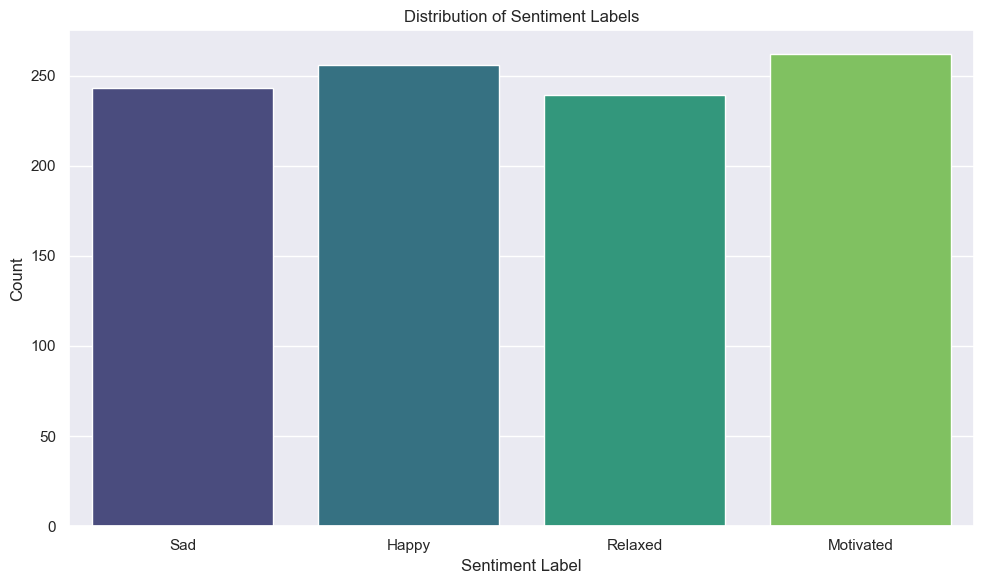

In [49]:
## Count Plot for Sentiment Labels
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Sentiment_Label', palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

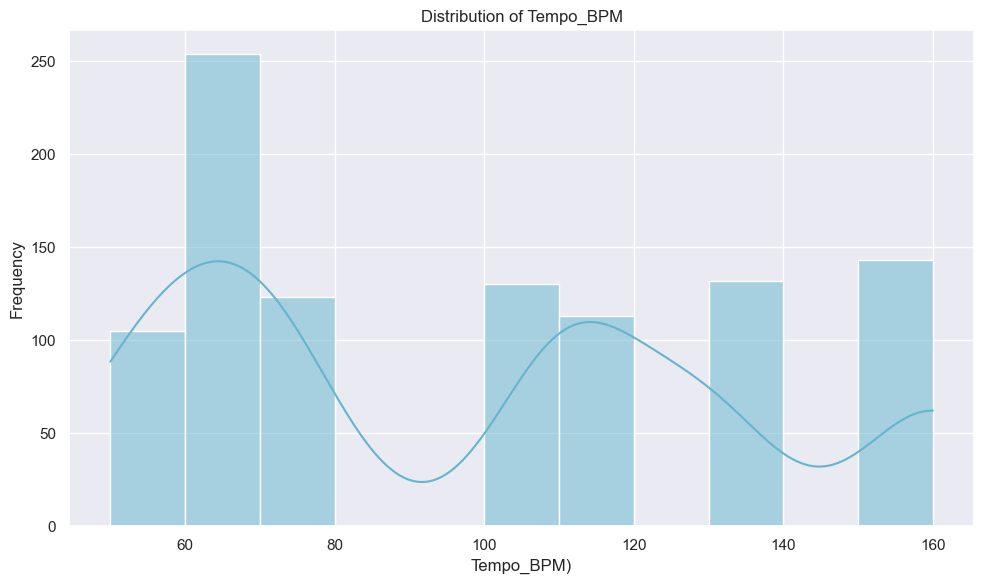

In [50]:
## Histogram for Tempo (BPM)
plt.figure(figsize=(10,6))
sns.histplot(data=music, x='Tempo_BPM', kde=True, color='c')
plt.title('Distribution of Tempo_BPM')
plt.xlabel('Tempo_BPM)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

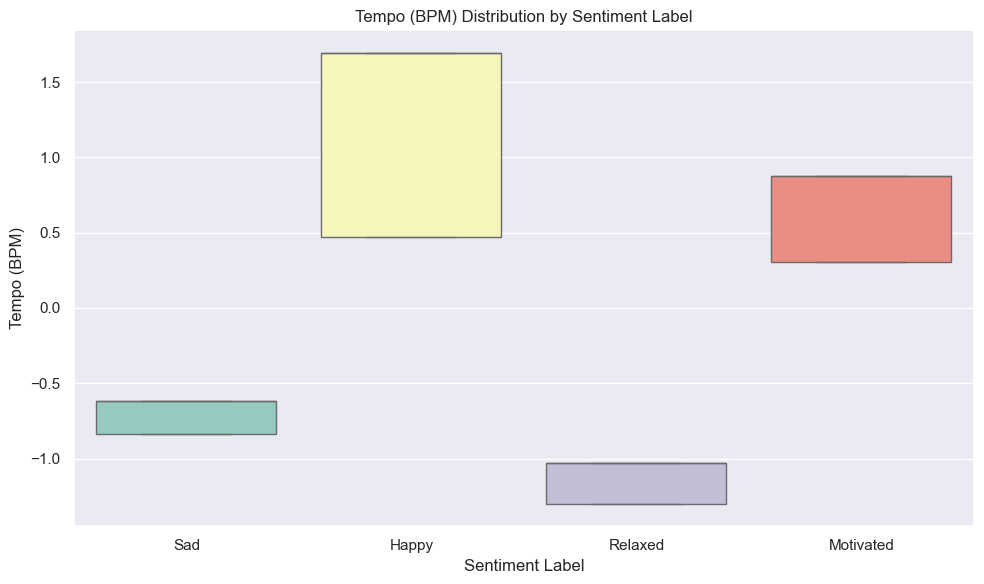

In [52]:
## Box Plot of Tempo (BPM) grouped by Sentiment Label
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Sentiment_Label', y='Tempo_BPM', palette='Set3')
plt.title('Tempo (BPM) Distribution by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Tempo (BPM)')
plt.tight_layout()
plt.show()


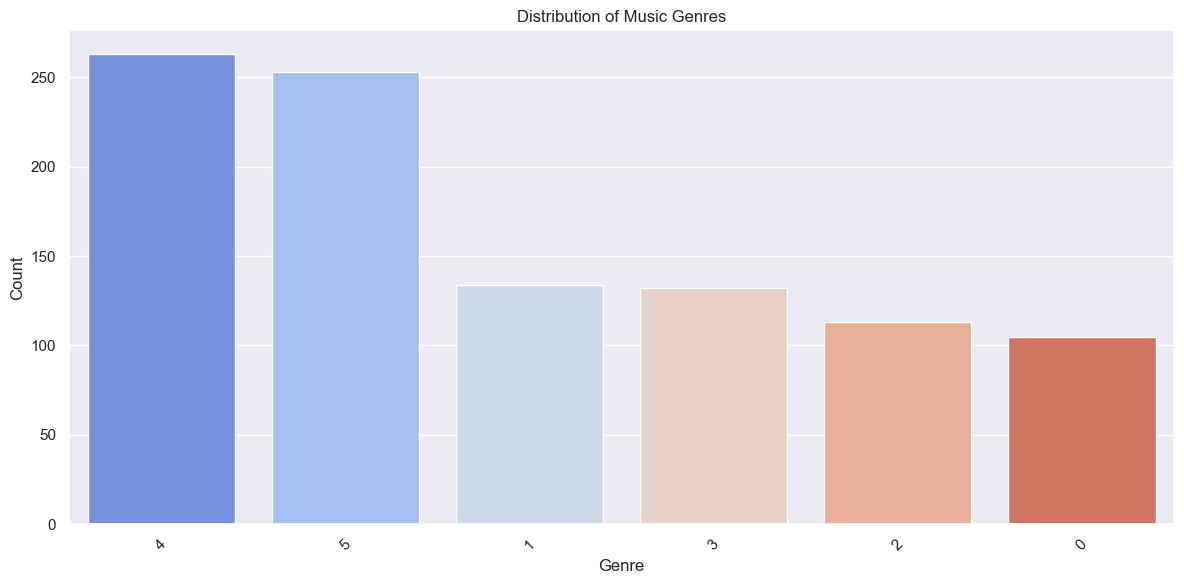

In [53]:
## Count Plot for Genre
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Genre', palette='coolwarm', order=df['Genre'].value_counts().index)
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x= df.drop('Sentiment_Label',axis = 1)
y =df.Sentiment_Label

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,stratify = y)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (800, 9)
Xtest: (200, 9)
Ytrain: (800,)
Ytest: (200,)


In [55]:
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [56]:
y_pred = rf_model.predict(xtest)

# Changed line: Using ytest instead of ytrain
accuracy = accuracy_score(ytest, y_pred)  
print(f'Accuracy of the RandomForest model: {accuracy:.4f}')

print('\nClassification Report:\n')
# Changed line: Using ytest instead of ytrain
print(classification_report(ytest, y_pred))

Accuracy of the RandomForest model: 1.0000

Classification Report:

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00        51
   Motivated       1.00      1.00      1.00        52
     Relaxed       1.00      1.00      1.00        48
         Sad       1.00      1.00      1.00        49

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



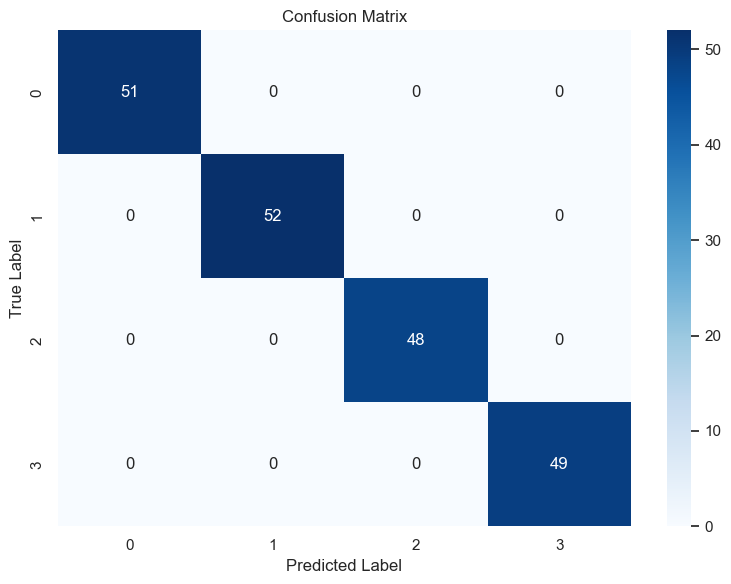

In [57]:
# Plotting the Confusion Matrix
from sklearn.metrics import confusion_matrix # Import confusion_matrix

cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [58]:
# to save your model
import joblib
joblib.dump(rf_model, open('Musicmodel.pkl','wb'))